In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [319]:
data = pd.read_csv('train.csv', index_col='AnimalID')

### lets start look on the data by split to animal types:

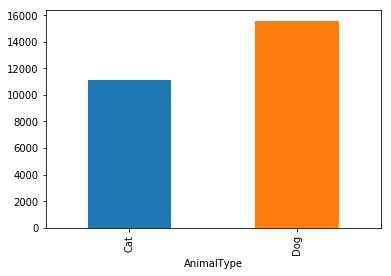

In [320]:
countAnimalType = data.groupby('AnimalType')['AnimalType'].count()
countAnimalType.plot(kind='bar')


now lets chack the outcome type for each animal type. considering we heve more dogs then cats, we compare precents of total animal type (cats and dogs) for each outcome type:

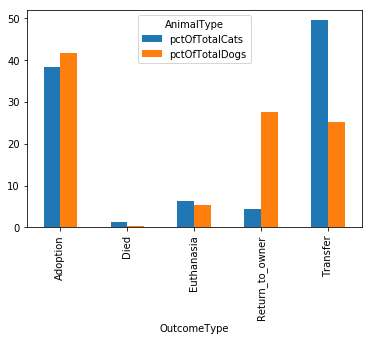

In [321]:
totalCats = countAnimalType.loc['Cat']
totalDogs = countAnimalType.loc['Dog']
AnimalTypeByOutcomeType= data.groupby(['OutcomeType','AnimalType'])['OutcomeType','AnimalType'].size().unstack()
AnimalTypeByOutcomeType['pctOfTotalCats'] = AnimalTypeByOutcomeType.Cat / totalCats * 100
AnimalTypeByOutcomeType['pctOfTotalDogs']= AnimalTypeByOutcomeType.Dog / totalDogs * 100
AnimalTypeByOutcomeType[['pctOfTotalCats','pctOfTotalDogs']].plot(kind='bar')

### as we can see:
 1. more precents of cats transferd than dogs.
 2. very small precent of cats return to owner.
 3. more cats die in shelter then dogs.

split data by SexuponOutcome:

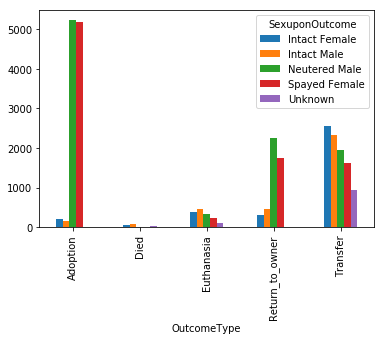

In [323]:
AnimalTypeByOutcomeType= data.groupby(['OutcomeType','SexuponOutcome'])['OutcomeType','SexuponOutcome'].size().unstack()
AnimalTypeByOutcomeType.fillna(0).plot(kind='bar')

these graph shows as that people more intresting in neutered animals(most of adoptions and returns to owner are neutered animals).

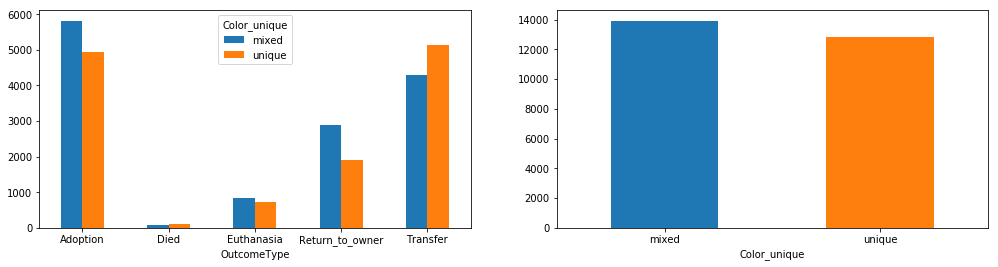

In [324]:
def is_unique_color(x):
    x= str(x)
    if x.find('/') < 0:
        return 'unique'
    else: 
        return 'mixed'
def is_mix(x):
    x= str(x)
    if x.find('Mix') > 0:
        return 'Mix'
    else:
        return 'unique'
    
data['Color_unique']= data['Color'].apply(is_unique_color)
fig = plt.figure(figsize=(17,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
data.groupby(['OutcomeType','Color_unique'])['OutcomeType','Color_unique'].size().unstack().plot(kind='bar',ax=ax1,rot=0)
data.groupby('Color_unique')['Color_unique'].count().plot(kind='bar',ax=ax2,rot=0)

these graph shows as that more unique color animals Transfer then mixed animal

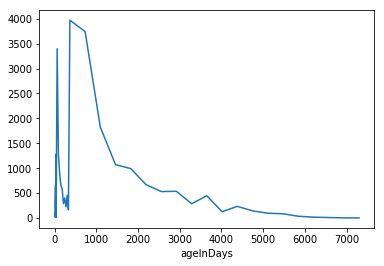

In [352]:
def ageInDays(x):
    x = str(x)
    if x.find('year') > 0:
        return int(x.split(' ')[0]) * 365
    elif x.find('month') > 0:
        return int(x.split(' ')[0]) * 30
    elif x.find('week') > 0:
        return int(x.split(' ')[0]) * 7
    elif x.find('day') > 0:
        return int(x.split(' ')[0])
    else: return 0

data['ageInDays'] = data['AgeuponOutcome'].apply(ageInDays)
data.groupby('ageInDays')['ageInDays'].count().plot()

graph shows normalize age in days

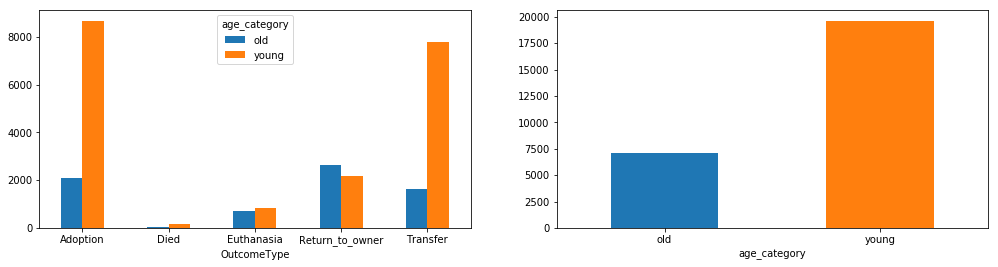

In [354]:
meanAgeInDays = data['ageInDays'].mean()
def ageCategory(x):
    x= int(x)
    if x < meanAgeInDays: return 'young'
    else: return 'old'
data['age_category'] = data['ageInDays'].apply(ageCategory)
fig = plt.figure(figsize=(17,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
data.groupby(['OutcomeType','age_category'])['OutcomeType','age_category'].size().unstack().plot(kind='bar',ax=ax1,rot=0)
data.groupby('age_category')['age_category'].count().plot(kind='bar',ax=ax2,rot=0)

these graph shows as that age is not a factor in retunrs to owner and euthanasia